# Analysis 5: Netflix Analysis
---
Ideas principales de [DataScience for Business](https://www.youtube.com/watch?v=nj3XnAAGG6E)

Analizando los datos de Netflix de mi hermana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sns.set_theme()

In [2]:
netflix = pd.read_csv("./archive/NetflixViewingHistoryMontse.csv")
netflix.head(20)

,Title,Date
0,The Witcher: Temporada 2: La semilla de la verdad,23/12/21
1,"tick, tick...BOOM!",16/12/21
2,Divergente,12/12/21
3,Leal,12/12/21
4,Anónima,11/12/21
5,Peaky Blinders: Temporada 1: Episodio 1,03/12/21
6,Academia del Chocolate: Temporada 1: Rompe el ...,03/12/21
7,Arcane: Temporada 1: ¡Feliz Día del Progreso!,19/11/21
8,Arcane: Temporada 1: La violencia bruta es nec...,19/11/21
9,Arcane: Temporada 1: Algunos misterios están m...,19/11/21


In [3]:
print(netflix.shape)
netflix.info()

(3060, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3060 non-null   object
 1   Date    3060 non-null   object
dtypes: object(2)
memory usage: 47.9+ KB


Notamos dos cosas interesantes, pareciera que las series están separadas por dos puntos, empezando por título, luego temporada y al final el nombre del capítulo, mientras que las películas solo tienen el nombre de la película. Además podemos notar que la fecha aún no es del tipo date.

In [4]:
separacion = netflix["Title"].str.split(pat=':', expand=False).to_frame()
separacion.head()

,Title
0,"[The Witcher, Temporada 2, La semilla de la ..."
1,"[tick, tick...BOOM!]"
2,[Divergente]
3,[Leal]
4,[Anónima]


In [5]:
separacion["num_partes"] = separacion["Title"].apply(len)
separacion.head()

,Title,num_partes
0,"[The Witcher, Temporada 2, La semilla de la ...",3
1,"[tick, tick...BOOM!]",1
2,[Divergente],1
3,[Leal],1
4,[Anónima],1


In [6]:
separacion["num_partes"].value_counts()

3    2365
4     340
1     200
2      86
5      59
6       9
8       1
Name: num_partes, dtype: int64

In [7]:
separacion.loc[separacion["num_partes"] == 1].head(10)

,Title,num_partes
1,"[tick, tick...BOOM!]",1
2,[Divergente],1
3,[Leal],1
4,[Anónima],1
11,[Alerta roja],1
51,[Shrek],1
65,[El club de la pelea],1
68,"[Yo, adolescente]",1
91,[Schumacher],1
108,[Hongos fantásticos],1


In [8]:
separacion.loc[separacion["num_partes"] == 2]

,Title,num_partes
42,"[Shrek, Para siempre el capítulo final]",2
66,"[Matrix, Revoluciones]",2
163,"[Headspace, Relaja tu mente]",2
201,"[8 Mile, Calle de las ilusiones]",2
208,"[Miraculous, Las aventuras de Ladybug - ¡Feli...",2
...,...,...
2909,"[¿Por qué a mí?, Lecciones de surf]",2
2910,"[¿Por qué a mí?, Más grande que Las Vegas]",2
2911,"[¿Por qué a mí?, El ADN de Taylor]",2
2912,"[Miniespías 3, Game over]",2


Parece ser que las partes con longitud 1 y 2 son únicamente de películas

In [9]:
separacion.loc[separacion["num_partes"] == 3].head(10)

,Title,num_partes
0,"[The Witcher, Temporada 2, La semilla de la ...",3
5,"[Peaky Blinders, Temporada 1, Episodio 1]",3
6,"[Academia del Chocolate, Temporada 1, Rompe ...",3
7,"[Arcane, Temporada 1, ¡Feliz Día del Progreso!]",3
8,"[Arcane, Temporada 1, La violencia bruta es ...",3
9,"[Arcane, Temporada 1, Algunos misterios está...",3
10,"[Arcane, Temporada 1, ¡Bienvenidos!]",3
13,"[Anne with an E, Temporada 1, Su voluntad va...",3
17,"[You, Temporada 2, Amigos son los amigos]",3
18,"[You, Temporada 2, Solo la puntita]",3


In [10]:
separacion.loc[separacion["num_partes"] == 4]

,Title,num_partes
12,"[El manual de juego, Temporada 1, Doc Rivers...",4
14,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
15,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
16,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
25,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
...,...,...
3051,"[Gravity Falls, Un verano de misterios, Temp...",4
3052,"[Gravity Falls, Un verano de misterios, Temp...",4
3054,"[Gravity Falls, Un verano de misterios, Temp...",4
3055,"[Gravity Falls, Un verano de misterios, Temp...",4


Mientras que para valores mayores a 2 parecieran ser para series

In [11]:
separacion["tipo"] = np.where(separacion["num_partes"] < 3, "pelicula", "serie")
separacion.head()

,Title,num_partes,tipo
0,"[The Witcher, Temporada 2, La semilla de la ...",3,serie
1,"[tick, tick...BOOM!]",1,pelicula
2,[Divergente],1,pelicula
3,[Leal],1,pelicula
4,[Anónima],1,pelicula


In [12]:
netflix = pd.concat([netflix, separacion["tipo"]], axis=1)
netflix.head()

,Title,Date,tipo
0,The Witcher: Temporada 2: La semilla de la verdad,23/12/21,serie
1,"tick, tick...BOOM!",16/12/21,pelicula
2,Divergente,12/12/21,pelicula
3,Leal,12/12/21,pelicula
4,Anónima,11/12/21,pelicula


In [14]:
separacion = netflix["Title"].str.split(pat=':', expand=True)
separacion.columns=['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5', 'nivel6', 'nivel7', 'nivel8']
separacion[20:40]

,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
20,You,Temporada 1,El castillo de Barba Azul,None,None,None,None,None
21,You,Temporada 1,Candace,None,None,None,None,None
22,Las chicas Gilmore,Temporada 4,Secuelas de una generación,None,None,None,None,None
23,Las chicas Gilmore,Temporada 4,"Tic, tic, tic, ¡bum!",None,None,None,None,None
24,Las chicas Gilmore,Temporada 4,Chicas en bikini,None,None,None,None,None
25,Miraculous,Las aventuras de Ladybug,Temporada 1,Clima Tempestuoso,None,None,None,None
26,Miraculous,Las aventuras de Ladybug,Temporada 1,Horrificadora,None,None,None,None
27,Miraculous,Las aventuras de Ladybug,Temporada 1,Cupido Negro,None,None,None,None
28,Miraculous,Las aventuras de Ladybug,Temporada 1,Lady Wifi,None,None,None,None
29,Las chicas Gilmore,Temporada 4,La reina Lorelai,None,None,None,None,None


In [15]:
netflix = pd.concat([netflix, separacion], axis=1)
netflix[20:40]

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
20,You: Temporada 1: El castillo de Barba Azul,07/11/21,serie,You,Temporada 1,El castillo de Barba Azul,None,None,None,None,None
21,You: Temporada 1: Candace,07/11/21,serie,You,Temporada 1,Candace,None,None,None,None,None
22,Las chicas Gilmore: Temporada 4: Secuelas de u...,05/11/21,serie,Las chicas Gilmore,Temporada 4,Secuelas de una generación,None,None,None,None,None
23,"Las chicas Gilmore: Temporada 4: Tic, tic, tic...",05/11/21,serie,Las chicas Gilmore,Temporada 4,"Tic, tic, tic, ¡bum!",None,None,None,None,None
24,Las chicas Gilmore: Temporada 4: Chicas en bikini,05/11/21,serie,Las chicas Gilmore,Temporada 4,Chicas en bikini,None,None,None,None,None
25,Miraculous: Las aventuras de Ladybug: Temporad...,05/11/21,serie,Miraculous,Las aventuras de Ladybug,Temporada 1,Clima Tempestuoso,None,None,None,None
26,Miraculous: Las aventuras de Ladybug: Temporad...,05/11/21,serie,Miraculous,Las aventuras de Ladybug,Temporada 1,Horrificadora,None,None,None,None
27,Miraculous: Las aventuras de Ladybug: Temporad...,05/11/21,serie,Miraculous,Las aventuras de Ladybug,Temporada 1,Cupido Negro,None,None,None,None
28,Miraculous: Las aventuras de Ladybug: Temporad...,05/11/21,serie,Miraculous,Las aventuras de Ladybug,Temporada 1,Lady Wifi,None,None,None,None
29,Las chicas Gilmore: Temporada 4: La reina Lorelai,05/11/21,serie,Las chicas Gilmore,Temporada 4,La reina Lorelai,None,None,None,None,None


In [16]:
netflix["Fecha"] = pd.to_datetime(netflix["Date"])
netflix.drop(columns = "Date", inplace = True)
netflix.set_index("Fecha", inplace=True)
netflix.head()

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
Fecha,,,,,,,,,,
2021-12-23,The Witcher: Temporada 2: La semilla de la verdad,serie,The Witcher,Temporada 2,La semilla de la verdad,None,None,None,None,None
2021-12-16,"tick, tick...BOOM!",pelicula,"tick, tick...BOOM!",None,None,None,None,None,None,None
2021-12-12,Divergente,pelicula,Divergente,None,None,None,None,None,None,None
2021-12-12,Leal,pelicula,Leal,None,None,None,None,None,None,None
2021-11-12,Anónima,pelicula,Anónima,None,None,None,None,None,None,None


In [17]:
def atributos_fecha(data):
  data['anio'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()

In [18]:
atributos_fecha(netflix)

In [19]:
netflix.head()

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8,anio,mes,dia_mes,dia_semana
Fecha,,,,,,,,,,,,,,
2021-12-23,The Witcher: Temporada 2: La semilla de la verdad,serie,The Witcher,Temporada 2,La semilla de la verdad,None,None,None,None,None,2021,December,23,Thursday
2021-12-16,"tick, tick...BOOM!",pelicula,"tick, tick...BOOM!",None,None,None,None,None,None,None,2021,December,16,Thursday
2021-12-12,Divergente,pelicula,Divergente,None,None,None,None,None,None,None,2021,December,12,Sunday
2021-12-12,Leal,pelicula,Leal,None,None,None,None,None,None,None,2021,December,12,Sunday
2021-11-12,Anónima,pelicula,Anónima,None,None,None,None,None,None,None,2021,November,12,Friday


In [20]:
hoy = pd.Timestamp(date.today())
primer_dia = netflix.index.min()

tiempo = hoy - primer_dia

print('Llevas {} dias con Netflix'.format(tiempo.days))

Llevas 2542 dias con Netflix


In [21]:
media_min_serie = 40
media_min_peli = 100
anios_con_netflix = tiempo.days/365

consumo = netflix.groupby("tipo")["Title"].count()

minutos_pelis_anio = consumo["pelicula"] * media_min_peli / anios_con_netflix
minutos_series_anio = consumo["serie"] * media_min_serie / anios_con_netflix

dias_pelis_anio = minutos_pelis_anio /60 /24
dias_series_anio = minutos_series_anio /60 /24

print(f"""Al año le dedicas {round(dias_series_anio)} dias a ver series.
Al año le dedicas {round(dias_pelis_anio)} dias a ver películas.""")

Al año le dedicas 11 dias a ver series.
Al año le dedicas 3 dias a ver películas.


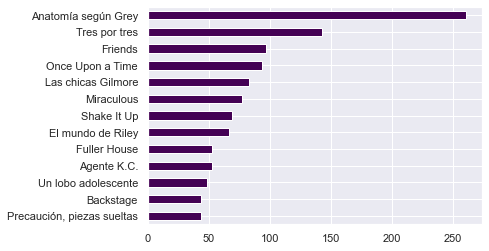

In [22]:
netflix.loc[netflix["tipo"] == 'serie']["nivel1"].value_counts(ascending=True).tail(13).plot.barh(cmap='viridis');

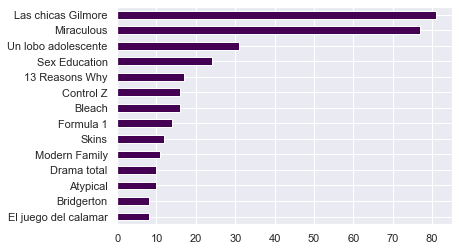

In [23]:
actual = netflix.loc[netflix["anio"] == 2021]
actual.loc[actual["tipo"] == 'serie', "nivel1"].value_counts(ascending=True).tail(14).plot.barh(cmap='viridis');

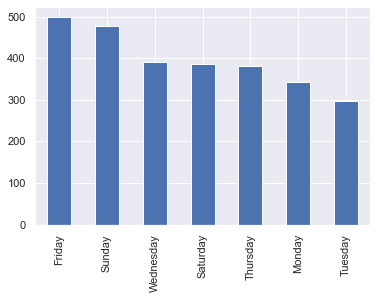

In [24]:
netflix.loc[netflix["tipo"] == "serie", "dia_semana"].value_counts().plot(kind="bar");

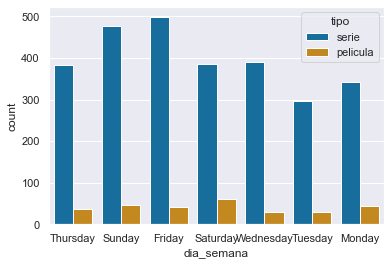

In [25]:
sns.countplot(data=netflix, x='dia_semana', hue='tipo', palette='colorblind');

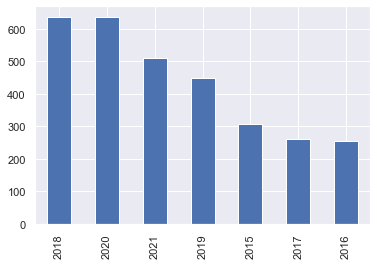

In [26]:
netflix["anio"].value_counts().plot.bar();

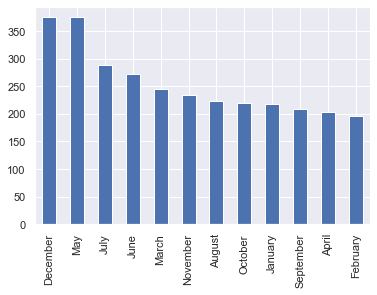

In [27]:
netflix["mes"].value_counts().plot.bar();

<AxesSubplot:>

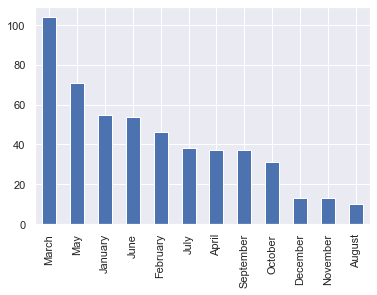

In [28]:
actual["mes"].value_counts().plot(kind="bar")